<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeM%C3%ADnimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consideremos el problema

$\frac{\mathrm{d^2 u} }{\mathrm{d} x^2}+u=x$

con las condiciones $u(0)=0$ y $u´(0)=2$.

Resolveremos este problema usando el método de mínimos cuadrados, proponemos una solución de la forma:

$U_N=\sum_{i=1}^{N}α_iβ_i(x)=α_1β_1(x)+α_2β_2(x)+...+α_Nβ_N(x)$

donde las $β_i(x)$ son llamadas funciones base.

Una medida de la aproximación de la solución $U_N$ es a través del error

$E=\frac{\mathrm{d^2 U_N} }{\mathrm{d} x^2}+U_N+x$

Pero elegimos los parámetros de modo tal que se minimice la cantidad:

$F=\int_{a}^{b}E^2dx$

donde $[a,b]$ es el intervalo de interés.

Para nuestro ejemplo solo necesitamos dos funciones base:

$U_N=\alpha_0+α_1x+α_2x^2+α_3x^3$

El intervalo en el que integraremos es $[0,1]$, ya que no se menciona ningún intervalo de interés en la imagen de la tarea.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, a, b = sp.symbols('x a b') # variable
u = sp.Function('u') # función

In [3]:
ode = u(x).diff(x,x) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0):0, u(x).diff(x).subs(x, 0):2})

In [5]:
sol

Eq(u(x), x + sin(x))

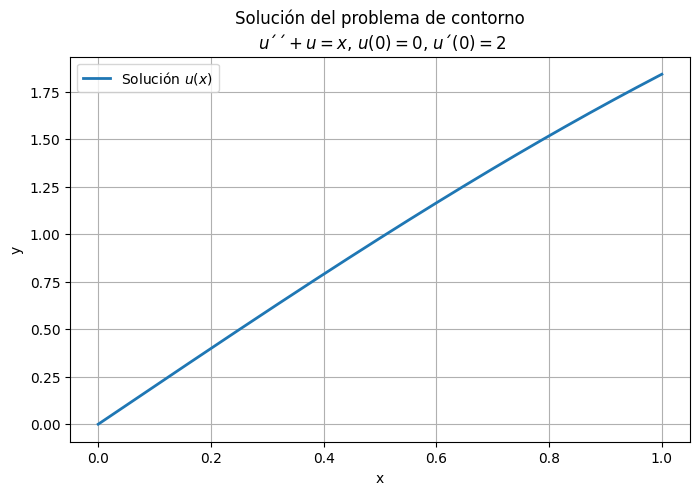

In [7]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u´´ + u=x$, $u(0)=0$, $u´(0)=2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
a,b,c,d=sp.symbols('a b c d')

u_n=a+b*x+c*x**2+d*x**3

In [10]:
u_n

a + b*x + c*x**2 + d*x**3

In [12]:
u_n_2=sp.diff(u_n,x,2)

E=u_n_2+u_n-x

Calculamos el error de la aproximación numérica:

In [13]:
E

a + b*x + c*x**2 + d*x**3 - x + 2*(c + 3*d*x)

Sustituyendo las condiciones iniciales tenemos que $a=0$ y $b=2$.

In [50]:
a_sym, b_sym, c_sym, d_sym = sp.symbols('a b c d')

F_substituted = E.subs({a_sym:0, b_sym:2})
F_substituted

c*x**2 + d*x**3 + x + 2*(c + 3*d*x)

In [51]:
I= sp.integrate(F_substituted**2,(x,0,1))

In [52]:
I

83*c**2/15 + 49*c*d/3 + 5*c/2 + 509*d**2/35 + 22*d/5 + 1/3

In [62]:
dIc=sp.diff(I,c)
dId=sp.diff(I,d)

In [61]:
print(dIc, "\n", dId)

166*c/15 + 49*d/3 + 5/2 
 49*c/3 + 1018*d/35 + 22/5


In [64]:
soleq=sp.solve([dIc,dId], [c,d], simplify=True)
soleq

{c: -1335/86789, d: -24759/173578}

In [69]:
u_b=2*x+c*x**2+d*x**3

In [70]:
u_b

c*x**2 + d*x**3 + 2*x

In [71]:
u_approx=u_b.subs(soleq)

In [72]:
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [73]:
u_approx_fn=sp.lambdify(x,u_approx, "numpy")

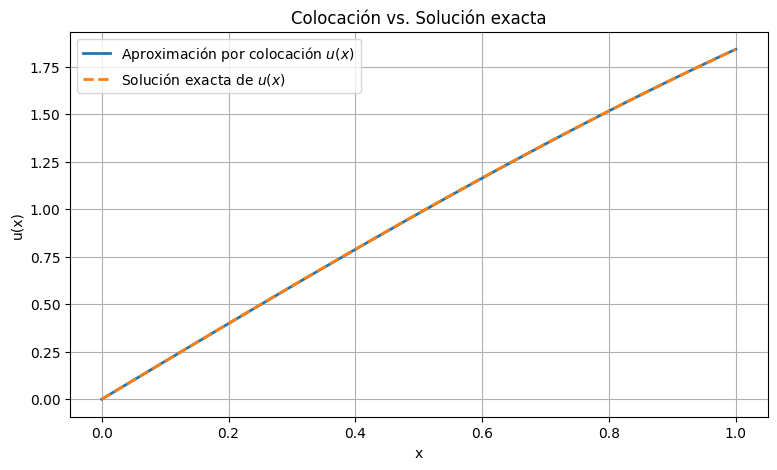

In [74]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)


plt.title('Colocación vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()